In [1]:
import pandas as pd
import numpy as np

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import des données des dataframes
df1=pd.read_csv('../data/world-happiness-report.csv')
df2_full=pd.read_csv('../data/world-happiness-report-2021.csv')
display(df1.head(1))
display(df2_full.head(1))

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [3]:
# Harmonisation par suppression des colonnes n'existant que dans le rapport 2021.
df2=df2_full.drop(['Regional indicator','Standard error of ladder score','upperwhisker',
                   'lowerwhisker','Ladder score in Dystopia','Explained by: Log GDP per capita',
                   'Explained by: Social support','Explained by: Healthy life expectancy',
                   'Explained by: Freedom to make life choices','Explained by: Generosity',
                   'Explained by: Perceptions of corruption','Dystopia + residual'],axis=1)

# Ajout de la colonne "year" sur le df2021 pour pouvoir le concatener avec le df1
df2.insert(loc=1,column='year',value=2021)

In [4]:
# Renommage des colonnes du df2021
df2=df2.rename(columns={'Ladder score':'Life Ladder','Logged GDP per capita':'Log GDP per capita',
                        'Healthy life expectancy':'Healthy life expectancy at birth'})

# Réindexation du df2021 par rapport au df1
df2.index=df2.index+1950
df2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
1950,Finland,2021,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1951,Denmark,2021,7.620,10.933,0.954,72.7,0.946,0.030,0.179
1952,Switzerland,2021,7.571,11.117,0.942,74.4,0.919,0.025,0.292
1953,Iceland,2021,7.554,10.878,0.983,73.0,0.955,0.160,0.673
1954,Netherlands,2021,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [5]:
# Concaténation des deux jeux de données en un trosième jeu global.
df_global=pd.concat([df1,df2],axis=0)
df_global

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2094,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,NaN,NaN
2095,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,NaN,NaN
2096,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167,NaN,NaN
2097,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,NaN,NaN


In [6]:
# Ajout de la colonne "Regional Indicator" pour indexer rattacher les pays à leur continent respectif indiqué dans le df2021.
# Apurement du df2021 pour ne conserver que les noms de pays et de continent.
df_continents=df2_full[['Country name','Regional indicator']]

In [7]:
# Fusion fusion du df_global avec celui des continents.
df_global2=df_global.merge(right=df_continents,on='Country name',how='outer')

In [8]:
# Déplacement de la colonne continent en 2e position.
df_global2.insert(1,'Regional indicator',df_global2.pop('Regional indicator'))
df_global2.head()

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [9]:
# Vérification des NaN pour la colonne des continents.
print(f'Il y a {df_global2["Regional indicator"].isna().sum()} valeurs manquantes pour la colonne des continents.')

Il y a 63 valeurs manquantes pour la colonne des continents.


In [10]:
# Calcul du nombre de pays n'ayant pas de continent de rattachement.
df_nan_continents=df_global2[df_global2['Regional indicator'].isna()]
print(f'Il y a {df_nan_continents.groupby("Country name").agg("min").shape[0]} pays dont le continent manque.')

Il y a 17 pays dont le continent manque.


In [11]:
# Import du fichier contenant l'ensemble des pays et de leur continent de rattachement.
df_continents=pd.read_csv('../data/pays&continents.csv',sep=';')
df_continents

,Country name,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Netherlands,Western Europe
...,...,...
161,South Sudan,Middle East and North Africa
162,Sudan,Middle East and North Africa
163,Suriname,Latin America and Caribbean
164,Syria,Middle East and North Africa


In [12]:
# Fusion du dataset des continent avec notre dataset principal.
df_global2=df_global.merge(right=df_continents,on='Country name',how='outer')

In [13]:
# Vérification du nombre de continents manquants.
print(f'Il y a {df_global2["Regional indicator"].isna().sum()} valeurs manquantes pour la colonne des continents.')

Il y a 0 valeurs manquantes pour la colonne des continents.


In [14]:
# Déplacement de la colonne régional indicator en 2e position.
df_global2.insert(1,'Regional indicator',df_global2.pop('Regional indicator'))

print("Le dataset complet jusqu'en 2021 est le suivant (pour les cinq premières lignes) :")
df_global2.head()

Le dataset complet jusqu'en 2021 est le suivant (pour les cinq premières lignes) :


,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [15]:
df_global2.info()
# Les types de données ont l'air cohérents

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2098 non-null   object 
 1   Regional indicator                2098 non-null   object 
 2   year                              2098 non-null   int64  
 3   Life Ladder                       2098 non-null   float64
 4   Log GDP per capita                2062 non-null   float64
 5   Social support                    2085 non-null   float64
 6   Healthy life expectancy at birth  2043 non-null   float64
 7   Freedom to make life choices      2066 non-null   float64
 8   Generosity                        2009 non-null   float64
 9   Perceptions of corruption         1988 non-null   float64
 10  Positive affect                   1927 non-null   float64
 11  Negative affect                   1933 non-null   float64
dtypes: flo

In [16]:
# Analyse des doublons : visiblement il n'y a pas de doublon.
print(f'Il y a {df_global2.duplicated().sum()} doublons dans le jeu de données.')

Il y a 0 doublons dans le jeu de données.


In [17]:
# Analyse de cohérence visuelle des données (orthographe, casse, etc.).
df_global2['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [18]:
# Analyse des autres valeurs manquantes.
df_global2.isna().sum()

Country name                          0
Regional indicator                    0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                     171
Negative affect                     165
dtype: int64

In [19]:
# Traitement des valeurs manquantes de df_global2.
# La statégie employée est la suivante : remplir les NaN avec la mediane des valeurs par pays sur les différentes années.
# Pour certains cas, des pays n'auraient aucune valeurs de la variable en question,
# Dans ce cas, on utilise la médiane de la valeur du continent de rattachement.
# Le traitement se fait donc d'abord par pays puis par continent.

In [20]:
# Calcul de la médiane en fonction des variables de pays groupés.
test=df_global2.groupby('Country name')['Perceptions of corruption'].agg('median')
test

Country name
Afghanistan    0.8710
Albania        0.8800
Algeria        0.7000
Angola         0.8700
Argentina      0.8510
                ...  
Venezuela      0.8200
Vietnam        0.7890
Yemen          0.8145
Zambia         0.8110
Zimbabwe       0.8305
Name: Perceptions of corruption, Length: 166, dtype: float64

In [21]:
# Exploration des differentes variables afin d'analyser les valeurs manquantes.
df_global2.sort_values('Perceptions of corruption').tail(50)

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1164,Malta,Western Europe,2013,6.380,10.422,0.942,71.96,0.909,0.410,NaN,0.660,0.370
1414,Oman,Middle East and North Africa,2011,6.853,10.382,NaN,65.50,0.916,0.025,NaN,NaN,0.295
1535,Qatar,Middle East and North Africa,2010,6.850,11.520,NaN,66.70,NaN,0.104,NaN,NaN,NaN
1536,Qatar,Middle East and North Africa,2011,6.592,11.553,0.857,67.02,0.905,0.012,NaN,0.761,0.328
1537,Qatar,Middle East and North Africa,2012,6.611,11.523,0.838,67.34,0.924,0.162,NaN,0.766,0.322
1538,Qatar,Middle East and North Africa,2015,6.375,11.486,NaN,68.30,NaN,NaN,NaN,NaN,NaN
1583,Saudi Arabia,Middle East and North Africa,2007,7.267,10.689,0.892,63.86,0.622,0.005,NaN,0.772,0.232
1586,Saudi Arabia,Middle East and North Africa,2010,6.307,10.693,0.880,64.40,0.678,-0.033,NaN,0.645,0.297
1587,Saudi Arabia,Middle East and North Africa,2011,6.700,10.758,0.830,64.60,0.603,-0.142,NaN,0.726,0.240
1588,Saudi Arabia,Middle East and North Africa,2012,6.396,10.779,0.867,64.80,0.560,-0.120,NaN,0.715,0.225


In [22]:
# Regroupement par pays pour poursuivre l'exploration des données.
df_global2[df_global2['Country name']=='Oman']

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1414,Oman,Middle East and North Africa,2011,6.853,10.382,NaN,65.5,0.916,0.025,NaN,NaN,0.295


In [23]:
# Séparation des variables catégorielles et des variables numériques et obtention des titres des colonnes.
cat_data_col = df_global2.select_dtypes(include=[object]).columns.tolist()
num_data_col = df_global2.select_dtypes(include=[np.number]).columns.tolist()
num_data_col.remove("year")
num_data_col

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [24]:
# Imputation de la médiane à la place des valeurs manquantes par pays et par colonne.
for c in num_data_col:
    df_global2[c]=df_global2.groupby('Country name')[c].transform(lambda x : x.fillna(x.median()))

In [25]:
# Vérification des valeurs manquantes.
print(f'Affichage du nombre de doublons par colonne dans le jeu de données soit {df_global2.isna().sum().sum()} valeurs manquantes.')
df_global2.isna().sum()

# On comprend ici que certaines valeurs manquantes n'ont pas pu etre remplies par manque de données et impossibilité de calculer la mediane avec rien

Affichage du nombre de doublons par colonne dans le jeu de données soit 36 valeurs manquantes.


Country name                         0
Regional indicator                   0
year                                 0
Life Ladder                          0
Log GDP per capita                  12
Social support                       1
Healthy life expectancy at birth     4
Freedom to make life choices         0
Generosity                          12
Perceptions of corruption            2
Positive affect                      3
Negative affect                      2
dtype: int64

In [26]:
# Exploration des lignes qui contiennent encore des valeurs manquantes.
df_global2[df_global2.isna().any(axis=1)]

# Par manque de données, on émet l'hypothèse que ces pays sont à des scores de q1 par rapport au continent auxquel ils appartiennt.

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
454,Cuba,Latin America and Caribbean,2006,5.418,NaN,0.970,68.44,0.281,NaN,NaN,0.647,0.277
1144,Maldives,South Asia,2018,5.198,9.826,0.913,70.60,0.855,0.024,0.825,NaN,NaN
1145,Maldives,South Asia,2021,5.198,9.826,0.913,70.60,0.854,0.024,0.825,NaN,NaN
1414,Oman,Middle East and North Africa,2011,6.853,10.382,NaN,65.50,0.916,0.025,NaN,NaN,0.295
1681,Somalia,Middle East and North Africa,2014,5.528,NaN,0.611,49.60,0.874,NaN,0.456,0.834,0.207
1682,Somalia,Middle East and North Africa,2015,5.354,NaN,0.599,50.10,0.968,NaN,0.410,0.901,0.187
1683,Somalia,Middle East and North Africa,2016,4.668,NaN,0.594,50.00,0.917,NaN,0.441,0.891,0.193
1684,Somaliland region,Middle East and North Africa,2009,4.991,NaN,0.880,NaN,0.746,NaN,0.513,0.819,0.112
1685,Somaliland region,Middle East and North Africa,2010,4.657,NaN,0.829,NaN,0.820,NaN,0.471,0.769,0.083
1686,Somaliland region,Middle East and North Africa,2011,4.931,NaN,0.788,NaN,0.858,NaN,0.357,0.749,0.122


In [27]:
# Imputation de la valeur du premier quartile de la zone continentale de rattachement à la place des valeurs manquantes par pays et par colonne.
for c in num_data_col:
    df_global2[c]=df_global2.groupby('Regional indicator')[c].transform(lambda x : x.fillna(x.quantile(q=0.25)))

In [28]:
# Vérification des valeurs manquantes.
print(f'Affichage du nombre de doublons par colonne dans le jeu de données soit {df_global2.isna().sum().sum()} valeurs manquantes.')
df_global2.isna().sum()

# On constate qu'il n'y a plus de valeur manquante.

Affichage du nombre de doublons par colonne dans le jeu de données soit 0 valeurs manquantes.


Country name                        0
Regional indicator                  0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [29]:
# Affichage du dataset complet et sans valeur manquante.
df_global2

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,Sub-Saharan Africa,2017,3.638,8.016,0.754,55.000,0.753,-0.098,0.751,0.806,0.224
2094,Zimbabwe,Sub-Saharan Africa,2018,3.616,8.049,0.775,55.600,0.763,-0.068,0.844,0.710,0.212
2095,Zimbabwe,Sub-Saharan Africa,2019,2.694,7.950,0.759,56.200,0.632,-0.064,0.831,0.716,0.235
2096,Zimbabwe,Sub-Saharan Africa,2020,3.160,7.829,0.717,56.800,0.643,-0.009,0.789,0.703,0.346


In [30]:
# Le dataset est entier, sans valeurs manquantes, sans fautes ni doublons.
#La seconde étape sera de réfléchir à un version viable pour un modèle de machine learning.

In [31]:
# Pas de données pour 2020 : COVID ?
# 166 pays sur 193 pays à l'ONU

In [32]:
# Étude du jeu de données pour savoir s'il faut plutôt normaliser ou standardiser.
df_global2.describe()

# On retient la moyenne car il ne semble pas y avoir de valeur aberrante dans le jeu de données.

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000
mean,2013.768827,5.471402,9.377713,0.812682,63.604683,0.746954,-0.001665,0.740112,0.709661,0.268576
std,4.486449,1.112676,1.149719,0.118084,7.468514,0.140717,0.160648,0.187903,0.106083,0.084029
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.652250,8.477250,0.749250,59.000000,0.653000,-0.117750,0.681250,0.626000,0.207000
50%,2014.000000,5.392000,9.463000,0.835500,65.280000,0.768500,-0.027000,0.796000,0.720750,0.259000
75%,2018.000000,6.282500,10.368750,0.905000,68.800000,0.860750,0.089000,0.867000,0.798000,0.319000
max,2021.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [33]:
# Regroupement des données par années puis calcul de la moyenne.
mean_per_year = df_global2.groupby('year').mean()
mean_per_year

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2005,6.446259,10.118667,0.897407,67.007407,0.824481,-0.012074,0.702667,0.744148,0.260093
2006,5.196899,9.043837,0.835809,60.334831,0.732315,0.007329,0.750492,0.719090,0.255584
2007,5.418275,9.172951,0.810108,61.329853,0.688961,0.014833,0.789480,0.710059,0.250216
2008,5.418509,9.167273,0.784391,61.414800,0.687623,0.022014,0.761905,0.704882,0.243545
2009,5.457667,9.262575,0.817996,62.553794,0.690675,-0.006614,0.763610,0.704930,0.247684
2010,5.496806,9.391665,0.828851,63.177286,0.711895,0.002169,0.749468,0.710855,0.241137
2011,5.424082,9.285729,0.802178,62.369753,0.732555,-0.015610,0.745973,0.700623,0.248822
2012,5.443754,9.397060,0.809063,63.418901,0.712613,-0.002658,0.746845,0.707000,0.260268
2013,5.394562,9.382015,0.806555,63.442164,0.726953,0.000708,0.756847,0.710956,0.271219


In [34]:
# On remarque que les valeurs de l'année 2005 semblent décalées par rapport aux autres données.
# On va alors analyser si c'est dû au nombre de données récoltées par année.
unique_years = df_global2['year'].unique()
sorted_years = sorted(unique_years, reverse=False)

for year in sorted_years:
    count = len(df_global2[df_global2['year'] == year])
    print(f"Nombre de lignes pour l'année {year}: {count}")

Nombre de lignes pour l'année 2005: 27
Nombre de lignes pour l'année 2006: 89
Nombre de lignes pour l'année 2007: 102
Nombre de lignes pour l'année 2008: 110
Nombre de lignes pour l'année 2009: 114
Nombre de lignes pour l'année 2010: 124
Nombre de lignes pour l'année 2011: 146
Nombre de lignes pour l'année 2012: 142
Nombre de lignes pour l'année 2013: 137
Nombre de lignes pour l'année 2014: 145
Nombre de lignes pour l'année 2015: 143
Nombre de lignes pour l'année 2016: 142
Nombre de lignes pour l'année 2017: 147
Nombre de lignes pour l'année 2018: 142
Nombre de lignes pour l'année 2019: 144
Nombre de lignes pour l'année 2020: 95
Nombre de lignes pour l'année 2021: 149


In [35]:
# On constate en effet que l'année 2005 comporte bien moins de données que les autres.
# On fait donc le choix de ne pas en tenir compte pour la normalisation et la standardisation afin de ne pas apporter de biais à notre analyse.

In [36]:
# Suppression des données de l'année 2005.
mean_per_year = mean_per_year.drop(2005)
mean_per_year

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2006,5.196899,9.043837,0.835809,60.334831,0.732315,0.007329,0.750492,0.719090,0.255584
2007,5.418275,9.172951,0.810108,61.329853,0.688961,0.014833,0.789480,0.710059,0.250216
2008,5.418509,9.167273,0.784391,61.414800,0.687623,0.022014,0.761905,0.704882,0.243545
2009,5.457667,9.262575,0.817996,62.553794,0.690675,-0.006614,0.763610,0.704930,0.247684
2010,5.496806,9.391665,0.828851,63.177286,0.711895,0.002169,0.749468,0.710855,0.241137
2011,5.424082,9.285729,0.802178,62.369753,0.732555,-0.015610,0.745973,0.700623,0.248822
2012,5.443754,9.397060,0.809063,63.418901,0.712613,-0.002658,0.746845,0.707000,0.260268
2013,5.394562,9.382015,0.806555,63.442164,0.726953,0.000708,0.756847,0.710956,0.271219
2014,5.389021,9.375869,0.806869,63.499362,0.738872,0.016917,0.732534,0.709376,0.270390


In [37]:
# Avant de passer à la normalisation et la standardisation, on va d'abord analyser les corrélations entre les variables.

In [38]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

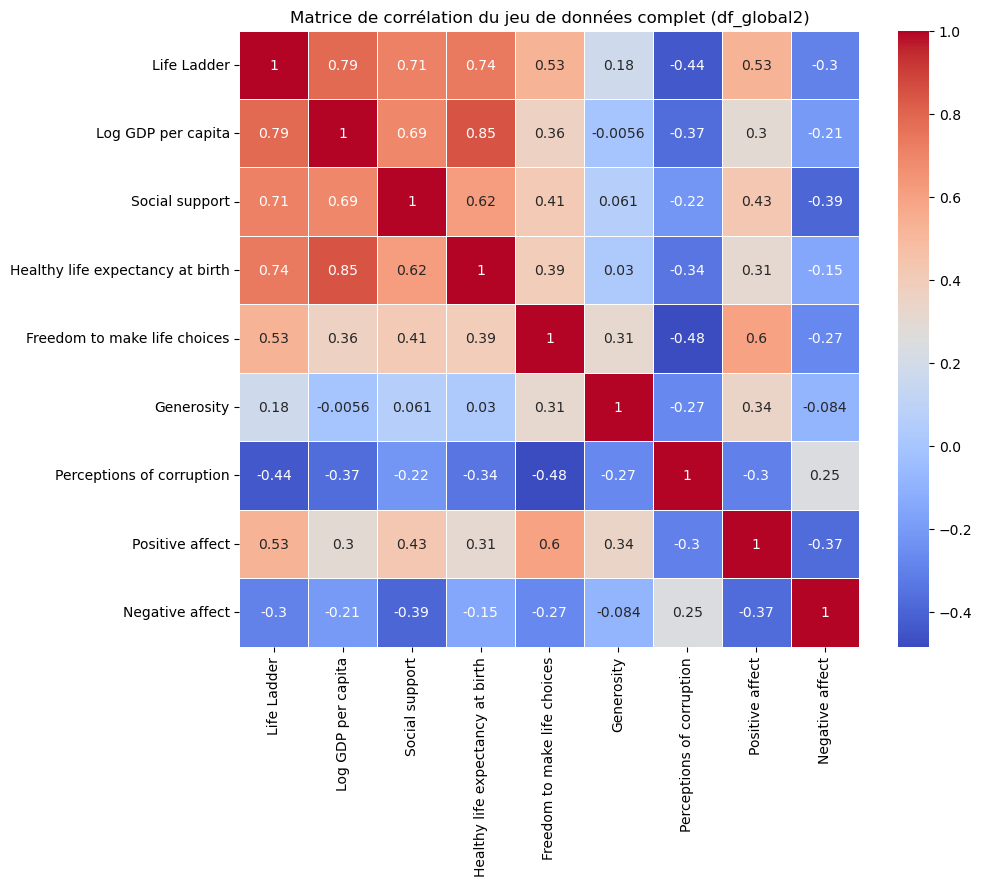

In [39]:
# Calcul et affichage des corrélations pour df_global2 par une carte de chaleur (heatmap)
correlation_matrix = df_global2[num_data_col].corr()
correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Matrice de corrélation du jeu de données complet (df_global2)')
plt.show()

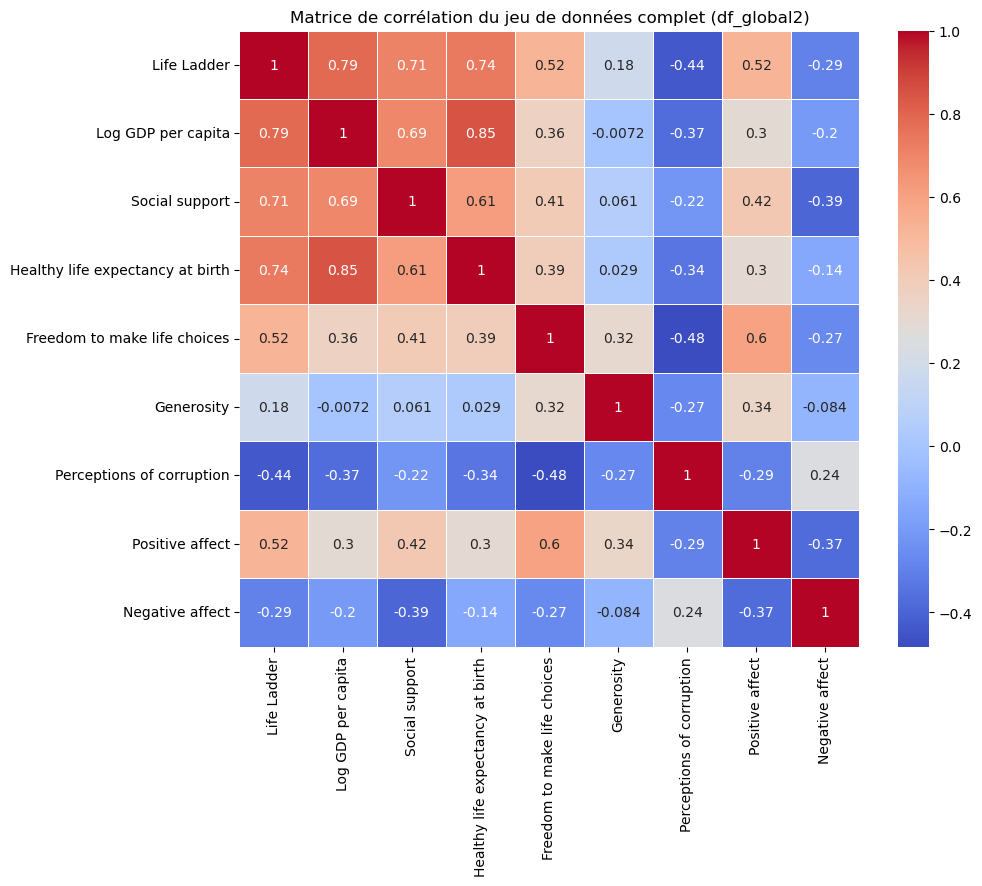

In [40]:
# Du fait de la suppression de l'année 2005 dans le jeu de données par année, on supprime également les données
# de cette années dans df_global2 afin de vérifier si cela a un impact important sur les corrélations.
df_global_3 = df_global2[df_global2['year'] != 2005]

correlation_matrix2 = df_global_3[num_data_col].corr()
correlation_matrix2

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Matrice de corrélation du jeu de données complet (df_global2)')
plt.show()

In [41]:
# A priori, l'impact est minime.

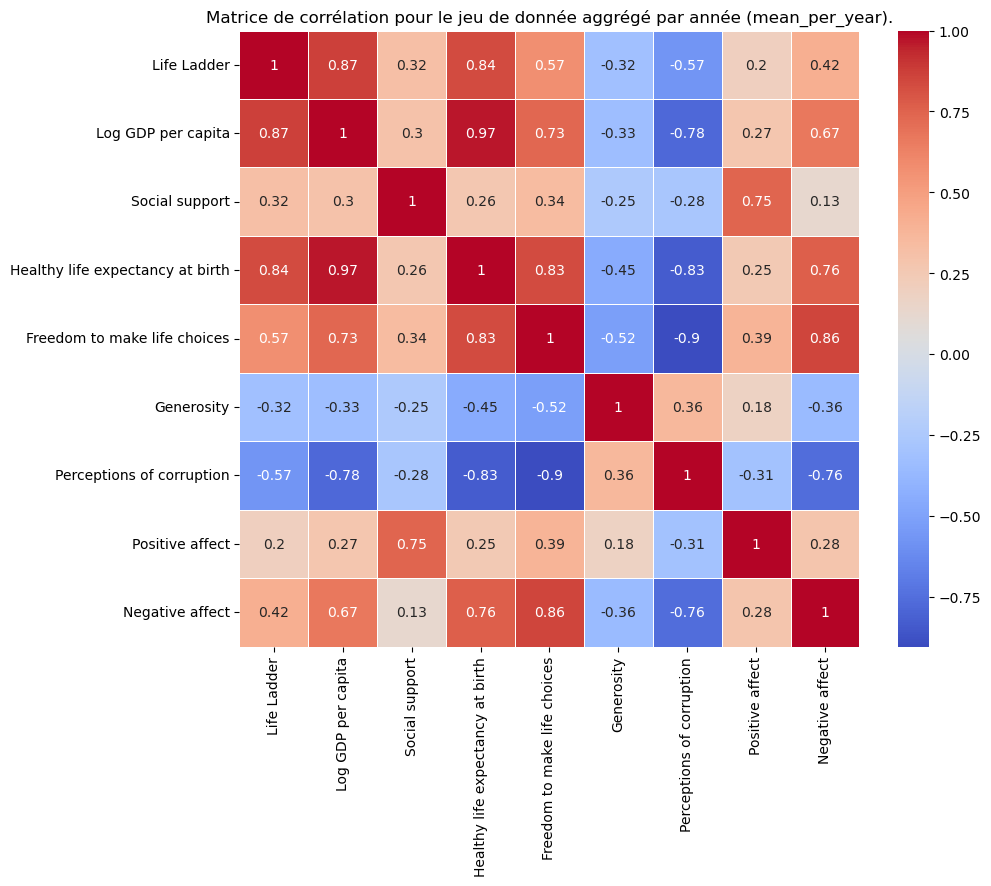

In [42]:
# Calcul et affichage des corrélations pour mean_per_year par une carte de chaleur (heatmap)
correlation_matrix_tot = mean_per_year[num_data_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_tot, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Matrice de corrélation pour le jeu de donnée aggrégé par année (mean_per_year).')
plt.show()

In [43]:
# On constate les corrélations semblent globalement identiques entre les deux jeux de données.
# Cependant, on constate également une opposition entre les corrélations pour la variable : "Negative affect".
# En effet, les corrélations observées pour cette variable dans le second graphiques semblent contrintuitives.
# C'est d'autant plus marqué que l'on observe pas la même chose avec le premier jeu de données.
# Plus précisément, on voit les points suivants dans le deuxième graphique :
# -Log GDP per capita et Negative affect : 0.67
# -Healthy life exceptancy at birth et Negative affect : 0.76
# -Freedom to make life choices et Negative affect : 0.86
# -Perceptions of corruption : -0.76
# Cela indiquerait donc que l'amélioration de variables "objectives" comme le PIB et l'espérance de vie en bonne santé
# ne serait pas corrélée avec les sentiments négatifs mais plutôt qu'il y serait négativement corrélés.
# De même, cela laisserait penser que plus la corruption augmente, moins celle-ci semble peser sur le moral de 
# la population comme si les gens n'y la considéraient comme uen forme de normalité.
# Ce point mériterait une analyse plus poussée.

In [44]:
correlation_matrix

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.786322,0.710474,0.737230,0.525354,0.182120,-0.440074,0.527471,-0.295255
Log GDP per capita,0.786322,1.000000,0.691411,0.846202,0.364679,-0.005601,-0.370899,0.298178,-0.205319
Social support,0.710474,0.691411,1.000000,0.616555,0.411139,0.061294,-0.220860,0.427152,-0.391778
Healthy life expectancy at birth,0.737230,0.846202,0.616555,1.000000,0.391859,0.030314,-0.340064,0.307367,-0.147611
Freedom to make life choices,0.525354,0.364679,0.411139,0.391859,1.000000,0.314624,-0.483697,0.599722,-0.270118
Generosity,0.182120,-0.005601,0.061294,0.030314,0.314624,1.000000,-0.274596,0.340364,-0.084411
Perceptions of corruption,-0.440074,-0.370899,-0.220860,-0.340064,-0.483697,-0.274596,1.000000,-0.300076,0.246501
Positive affect,0.527471,0.298178,0.427152,0.307367,0.599722,0.340364,-0.300076,1.000000,-0.374728
Negative affect,-0.295255,-0.205319,-0.391778,-0.147611,-0.270118,-0.084411,0.246501,-0.374728,1.000000


In [45]:
# Réaffichage de la matrice de corrélation (mean_per_year) sous forme de tableau.
correlation_matrix_tot

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.866532,0.315993,0.835125,0.574309,-0.323263,-0.574119,0.203448,0.417077
Log GDP per capita,0.866532,1.000000,0.295493,0.969346,0.732859,-0.332590,-0.780310,0.272684,0.669196
Social support,0.315993,0.295493,1.000000,0.264680,0.340770,-0.248374,-0.275501,0.746278,0.126148
Healthy life expectancy at birth,0.835125,0.969346,0.264680,1.000000,0.834624,-0.454966,-0.830657,0.249806,0.762491
Freedom to make life choices,0.574309,0.732859,0.340770,0.834624,1.000000,-0.523715,-0.903632,0.388049,0.857545
Generosity,-0.323263,-0.332590,-0.248374,-0.454966,-0.523715,1.000000,0.362999,0.178588,-0.359200
Perceptions of corruption,-0.574119,-0.780310,-0.275501,-0.830657,-0.903632,0.362999,1.000000,-0.308566,-0.761165
Positive affect,0.203448,0.272684,0.746278,0.249806,0.388049,0.178588,-0.308566,1.000000,0.284604
Negative affect,0.417077,0.669196,0.126148,0.762491,0.857545,-0.359200,-0.761165,0.284604,1.000000


In [46]:
# En dehors de la variable de négativité, on remarque les points suivants :

# Fortes corrélations positives:

# Healthy life expectancy & Log GDP per capita : Avec une corrélation de 0.969, cela suggère qu'il existe une 
# très forte relation positive entre l'espérance de vie en bonne santé à la naissance et le PIB par habitant.
# Les pays avec un PIB par habitant plus élevé ont généralement une espérance de vie en bonne santé plus longue. 
# Cela peut être dû à de meilleurs soins de santé, à une meilleure nutrition et à d'autres facteurs sociaux et 
# économiques dans les pays plus riches.

# Life Ladder & Log GDP per capita : Le coefficient de corrélation est de 0.866, ce qui indique une forte corrélation positive.
# Cela signifie que, en général, lorsque le PIB par habitant augmente, le Life Ladder tend également à augmenter. 
# C'est cohérent avec l'idée que des niveaux de revenu plus élevés sont souvent associés à un bien-être plus élevé.
# Cela reflète souvent une meilleure qualité de vie, une sécurité accrue, et d'autres avantages associés à une économie plus forte.

# Positive affect & Social support (0.746) : cette corrélation indique que lorsque les personnes ressentent un 
# soutien social plus élevé, elles ont également tendance à éprouver des affects positifs plus fréquemment. 
# Le soutien social peut inclure des relations familiales et amicales solides, des interactions sociales régulières, etc.

# Freedom to make life choices & Log GDP per capita : Une corrélation de 0.733 montre que la liberté de faire des 
# choix de vie tend à augmenter avec le PIB par habitant.

In [47]:
#Fortes corrélations négatives:

# Freedom to make life choices & Perceptions of corruption (-0.904) : Cette forte corrélation négative suggère que 
# dans les endroits où les perceptions de corruption sont élevées, la liberté de faire des choix de vie est généralement réduite.
# La corruption peut entraver la liberté individuelle et la confiance dans les institutions.

# Healthy life expectancy at birth & Perceptions of corruption (-0.831) : les pays avec des perceptions élevées de 
# corruption ont tendance à avoir une espérance de vie en bonne santé plus courte. 
# La corruption peut affecter la qualité des soins de santé, l'accès à des services médicaux de qualité, et 
# d'autres facteurs importants pour la santé.

# Log GDP per capita & Perceptions of corruption (-0.780) : une économie plus forte (mesurée par le PIB par 
# habitant) est généralement associée à des perceptions plus faibles de la corruption. Les pays avec un PIB par 
# habitant plus élevé peuvent avoir des institutions plus solides, une meilleure gouvernance et une réglementation
# plus stricte pour contrer la corruption.

In [48]:
# Si l'on exclu la perception de la corruption de l'analyse, les corrélations négatives principales sont les suivantes :

# Freedom to make life choices & Generosity (-0.524) : cette corrélation négative indique que lorsqu'il y a une 
# plus grande liberté de faire des choix de vie, la générosité tend à être plus faible. 
# C'est une observation intéressante et pourrait suggérer que dans les sociétés où les individus ont plus de 
# liberté personnelle, il pourrait y avoir moins d'incitatifs ou de pressions sociales pour des actes généreux. 
# Cependant, il est important de noter que la causalité n'est pas claire, et d'autres facteurs pourraient 
# influencer cette relation.

# Healthy life expectancy at birth & Generosity (-0.455) : les pays ayant une espérance de vie en bonne santé plus 
# longue semblent avoir des niveaux de générosité plus bas. 
# Cela pourrait être dû à divers facteurs socio-économiques, comme une plus grande sécurité économique réduisant 
# la nécessité de dons charitables, mais cela nécessite une investigation plus approfondie.

# Log GDP per capita & Generosity (-0.333) : il semble y avoir une corrélation négative modérée entre le PIB par 
# habitant et la générosité. Cela pourrait suggérer que les pays plus riches (en termes de PIB par habitant) sont moins généreux. 
# Cependant, cela pourrait aussi être dû à la manière dont la "générosité" est mesurée, car les dons charitables 
# dans les pays riches pourraient prendre des formes différentes ou être influencés par des facteurs fiscaux.

# Life Ladder & Generosity (-0.323) : cette corrélation suggère que le bien-être ou le bonheur (mesuré par Life Ladder)
# est légèrement négativement corrélé avec la générosité. 
# Cela pourrait signifier que dans les régions où les gens sont plus heureux ou satisfaits de leur vie, il y a 
# moins d'actes de générosité. 
# Encore une fois, cela pourrait être lié à la manière dont la générosité est mesurée ou à des facteurs culturels ou socio-économiques.

In [49]:
# En résumé, ces corrélations suggèrent que le PIB par habitant, l'espérance de vie en bonne santé, et la liberté 
# de faire des choix de vie sont étroitement liés et influencent positivement le bien-être des individus. 
# En revanche, la corruption semble avoir des effets négatifs sur ces mêmes facteurs.

In [50]:
# On cherche ensuite à étudier si les données du jeu df_global2 suivent ou non une distribution normale.

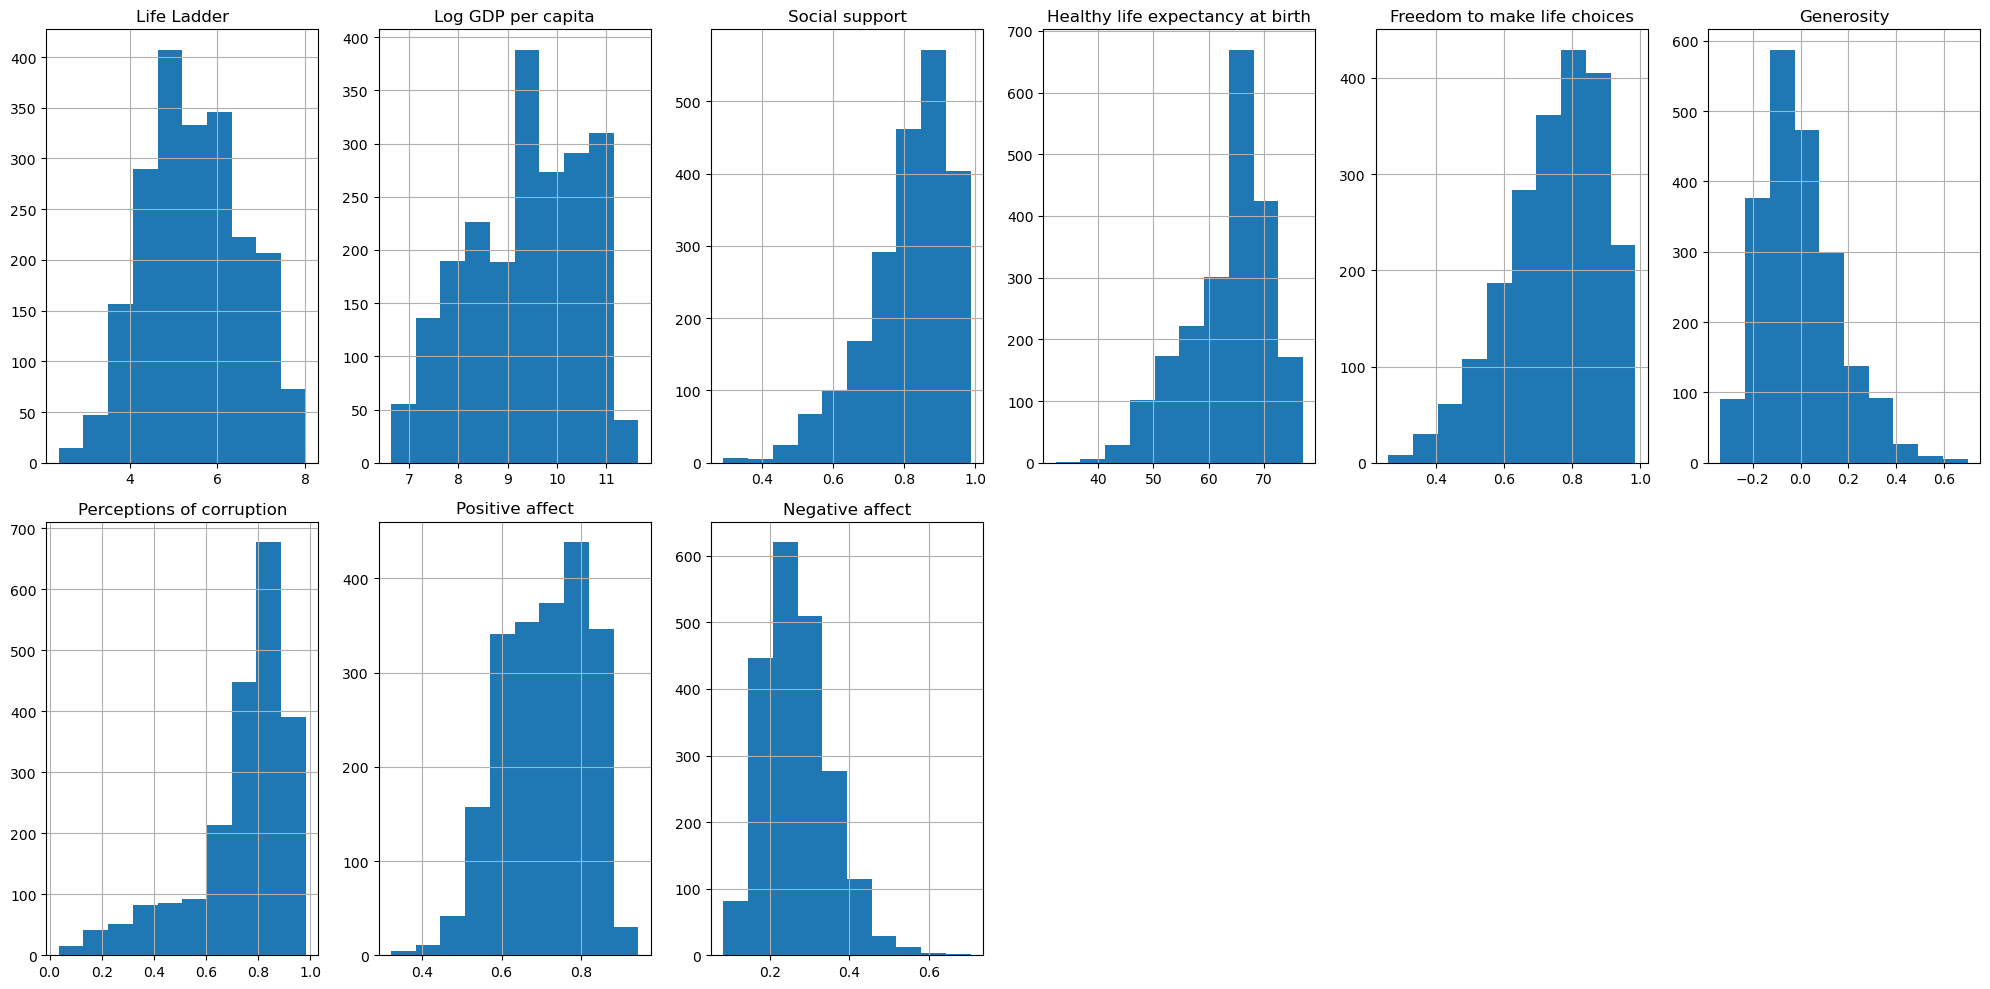

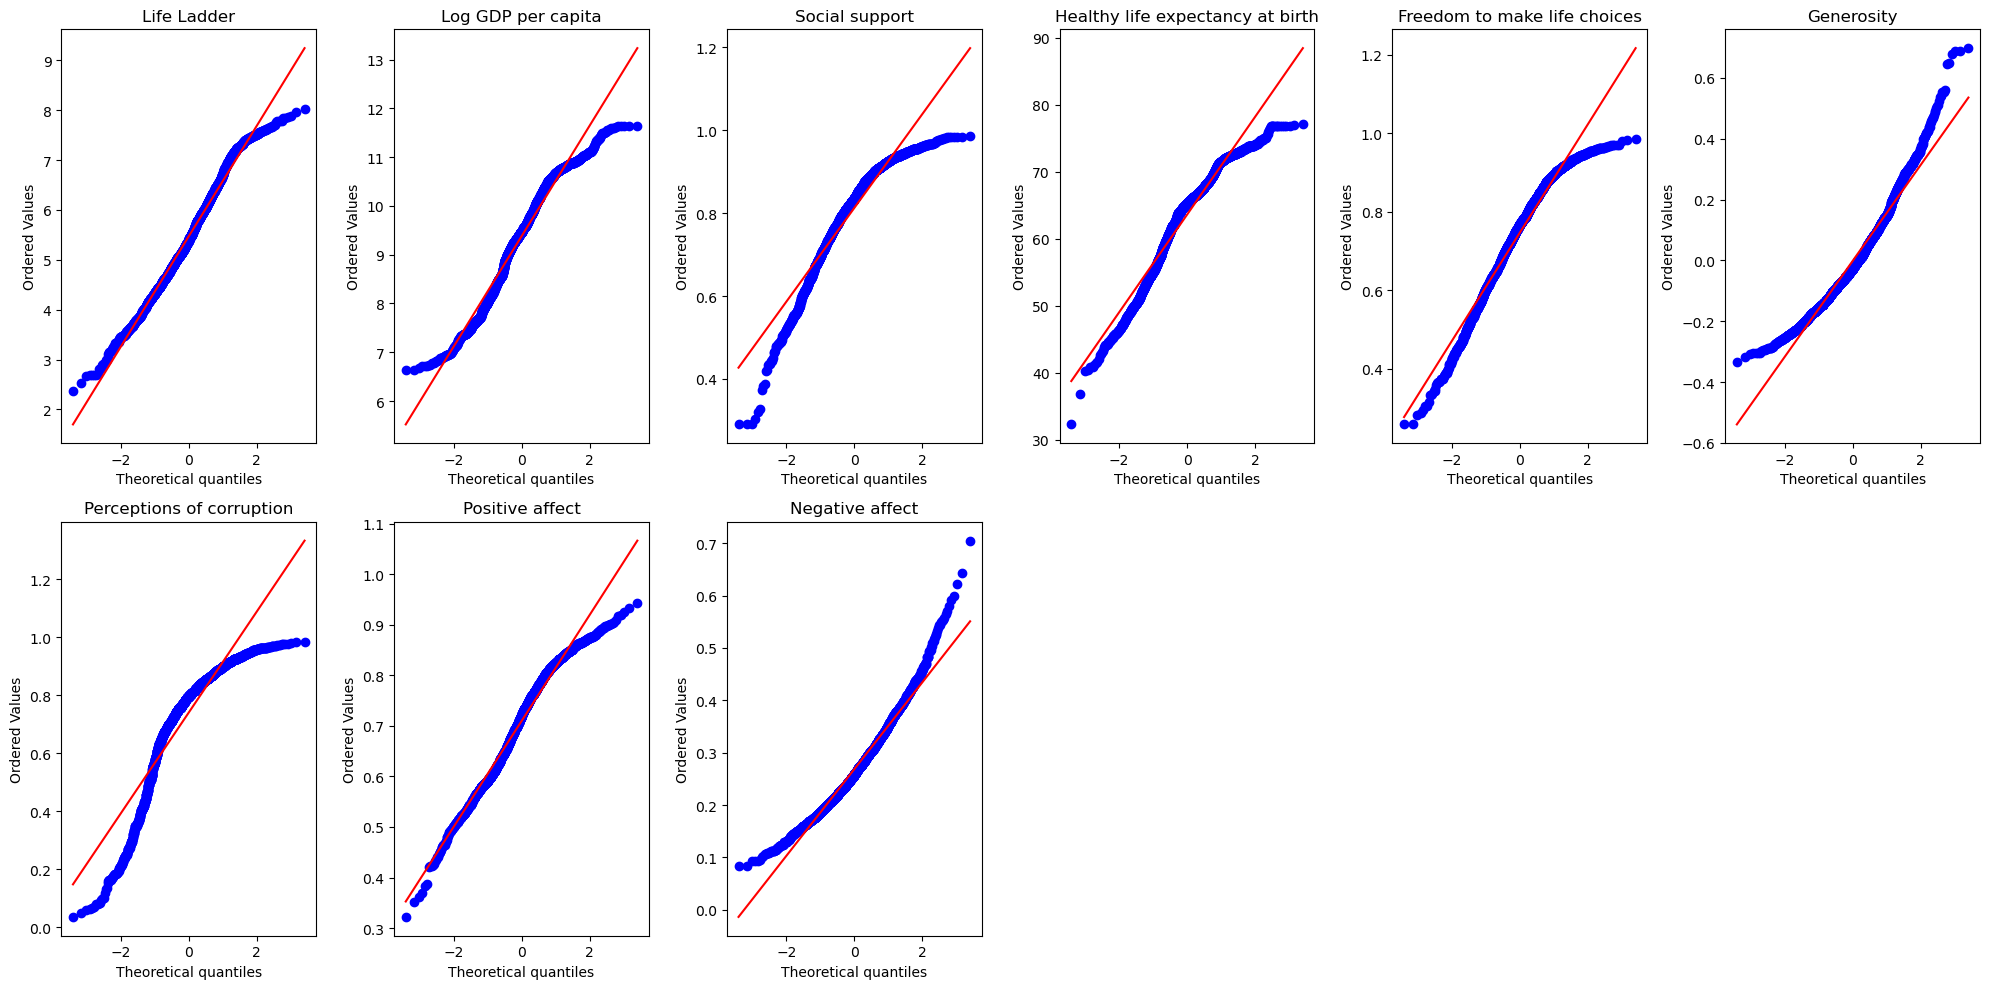

Test de Shapiro-Wilk pour Life Ladder:
Statistique = 0.9876764416694641, p-valeur = 1.8873522536488885e-12
La variable Life Ladder ne suit pas une distribution normale.

Test de Shapiro-Wilk pour Log GDP per capita:
Statistique = 0.9676324129104614, p-valeur = 2.575927063350183e-21
La variable Log GDP per capita ne suit pas une distribution normale.

Test de Shapiro-Wilk pour Social support:
Statistique = 0.9175028204917908, p-valeur = 2.1935789878099318e-32
La variable Social support ne suit pas une distribution normale.

Test de Shapiro-Wilk pour Healthy life expectancy at birth:
Statistique = 0.9512403011322021, p-valeur = 7.314057003034367e-26
La variable Healthy life expectancy at birth ne suit pas une distribution normale.

Test de Shapiro-Wilk pour Freedom to make life choices:
Statistique = 0.9602036476135254, p-valeur = 1.5024510694485503e-23
La variable Freedom to make life choices ne suit pas une distribution normale.

Test de Shapiro-Wilk pour Generosity:
Statistique = 0.96

In [51]:
# Création d'une figure pour les histogrammes
plt.figure(figsize=(20, 10))

# Pour chaque colonne dans vos données
for i, col in enumerate(df_global2[num_data_col].columns, 1):
    plt.subplot(2, len(df_global2.columns) // 2, i)
    df_global2[col].hist()
    plt.title(col)

plt.tight_layout()
plt.show()

# Affichage des Q-Q Plots
plt.figure(figsize=(20, 10))

for i, col in enumerate(df_global2[num_data_col].columns, 1):
    plt.subplot(2, len(df_global2.columns) // 2, i)
    stats.probplot(df_global2[col], plot=plt)
    plt.title(col)

plt.tight_layout()
plt.show()

# Test de Shapiro-Wilk pour la normalité
for col in df_global2[num_data_col].columns:
    shapiro_test = stats.shapiro(df_global2[col])
    print(f"Test de Shapiro-Wilk pour {col}:")
    print(f"Statistique = {shapiro_test.statistic}, p-valeur = {shapiro_test.pvalue}")
    if shapiro_test.pvalue < 0.05:
        print(f"La variable {col} ne suit pas une distribution normale.\n")
    else:
        print(f"La variable {col} suit une distribution normale.\n")

In [52]:
# On constate qu'aucune colonne ne correspond à une distribution normale.
# En effet, on le constate graphiquement par les histogrammes et les Q-Q plots.
# En outre, on réalise un test de Shapiro-Wilk pour le confirmer.
# Pour rappel, il test l'hypothèse nulle selon laquelle une variable est normalement distribuée. 
# Si la p-valeur est inférieure à un seuil de significativité (généralement 0,05), alors l'hypothèse nulle est rejetée et les données ne sont pas normalement distribuées.
# Ainsi, ces différents points nous conduisent à privilégier la normalisation à la standardisation.

In [53]:
# On va tester la même chose mais cette fois-ci sur les données regroupées par année

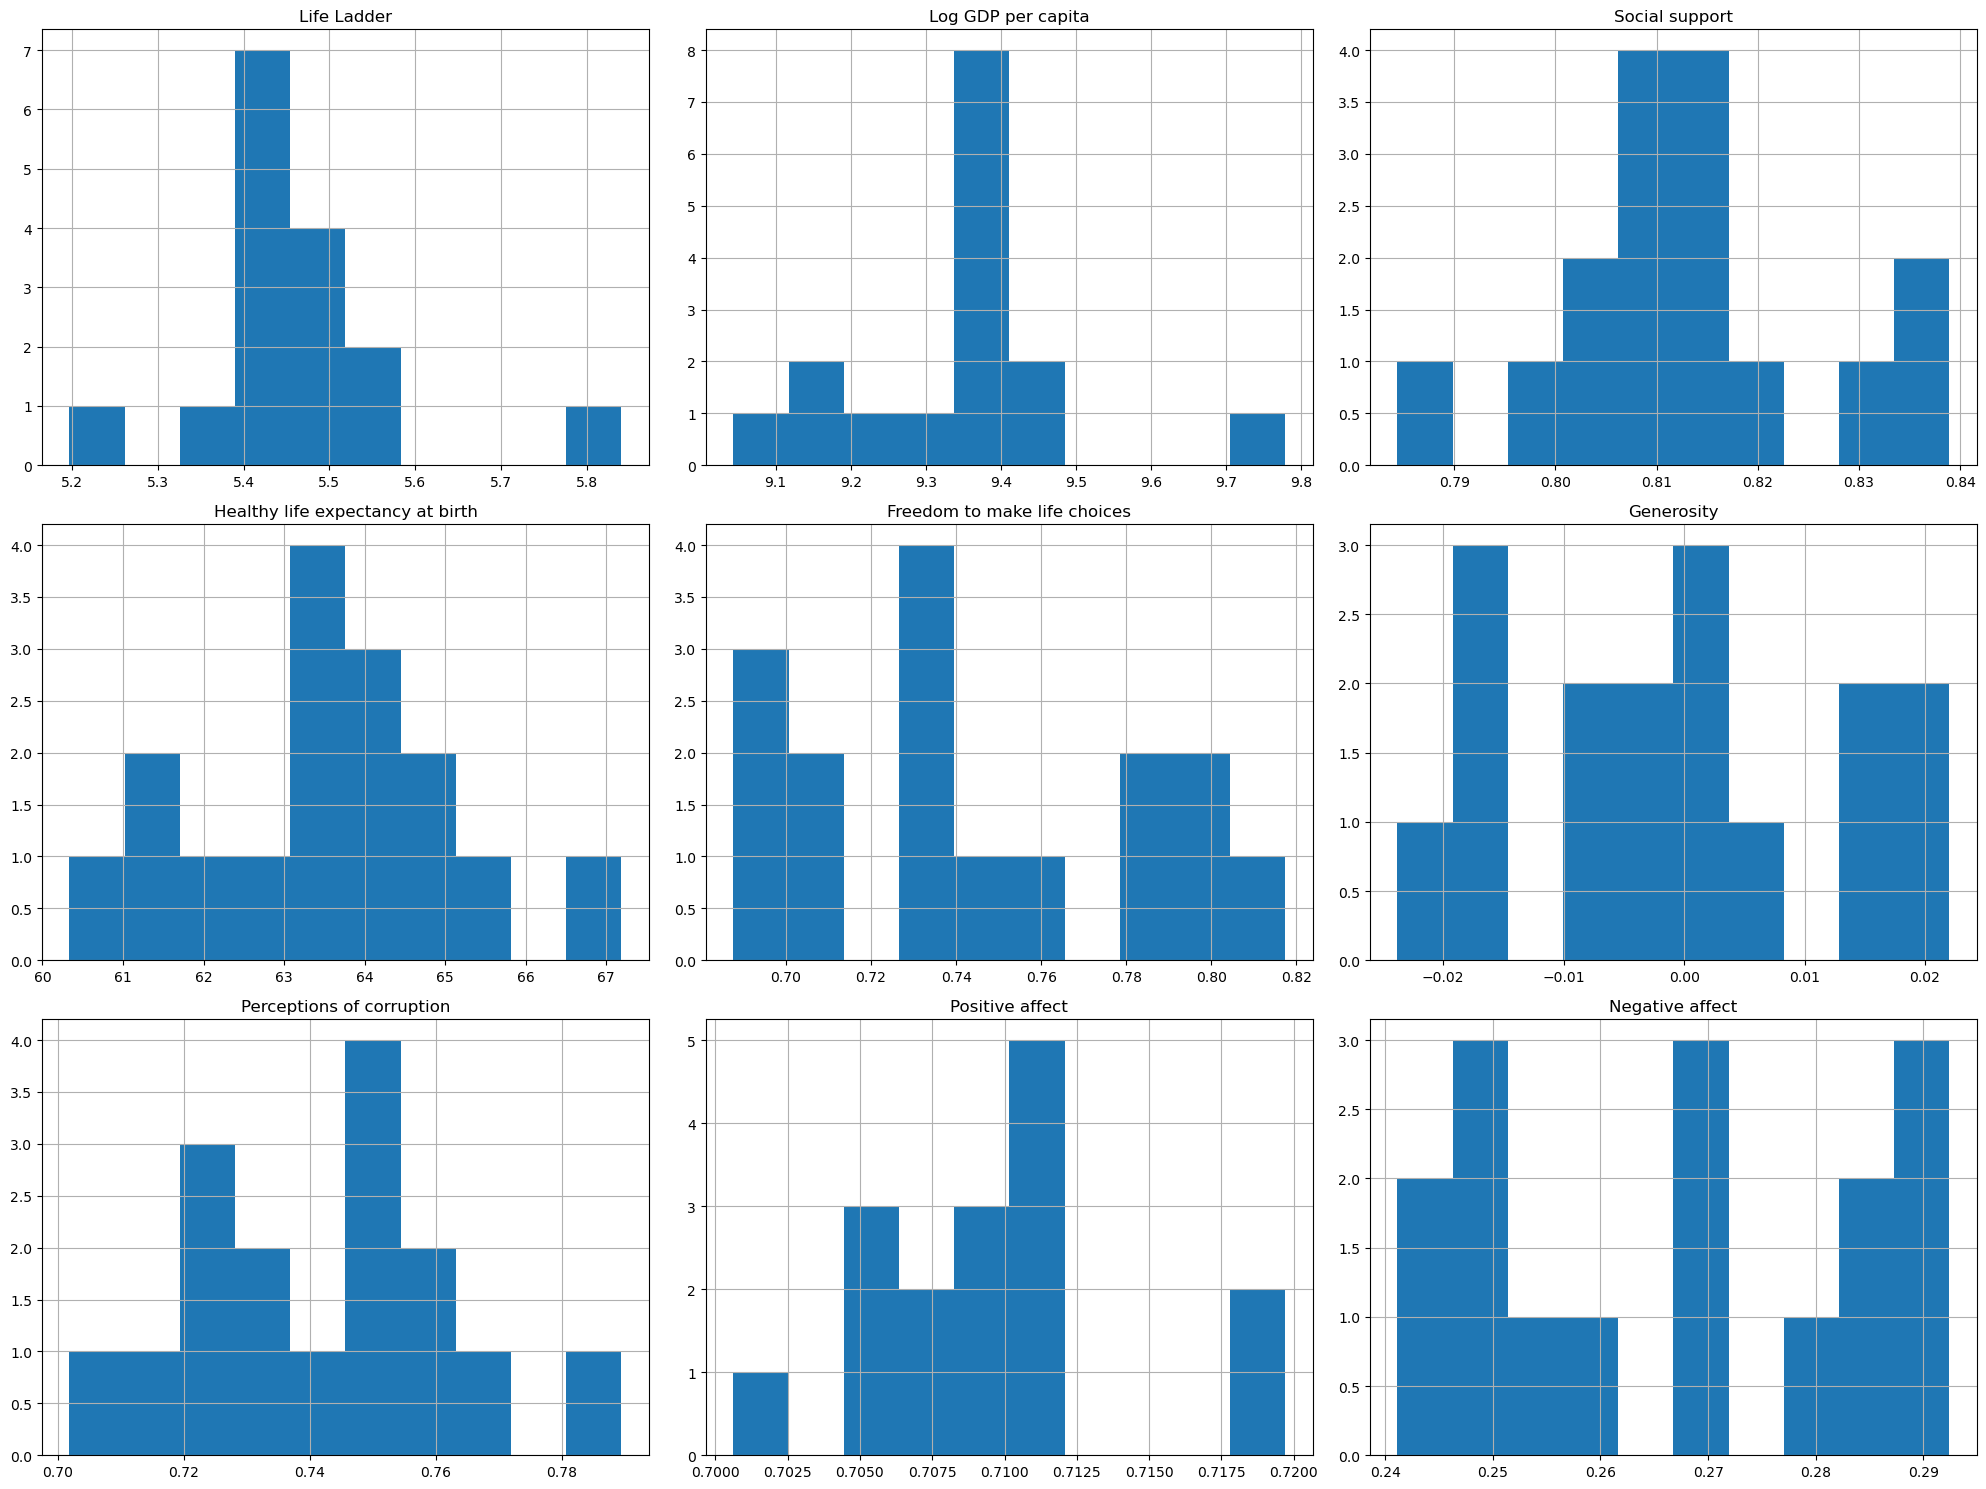

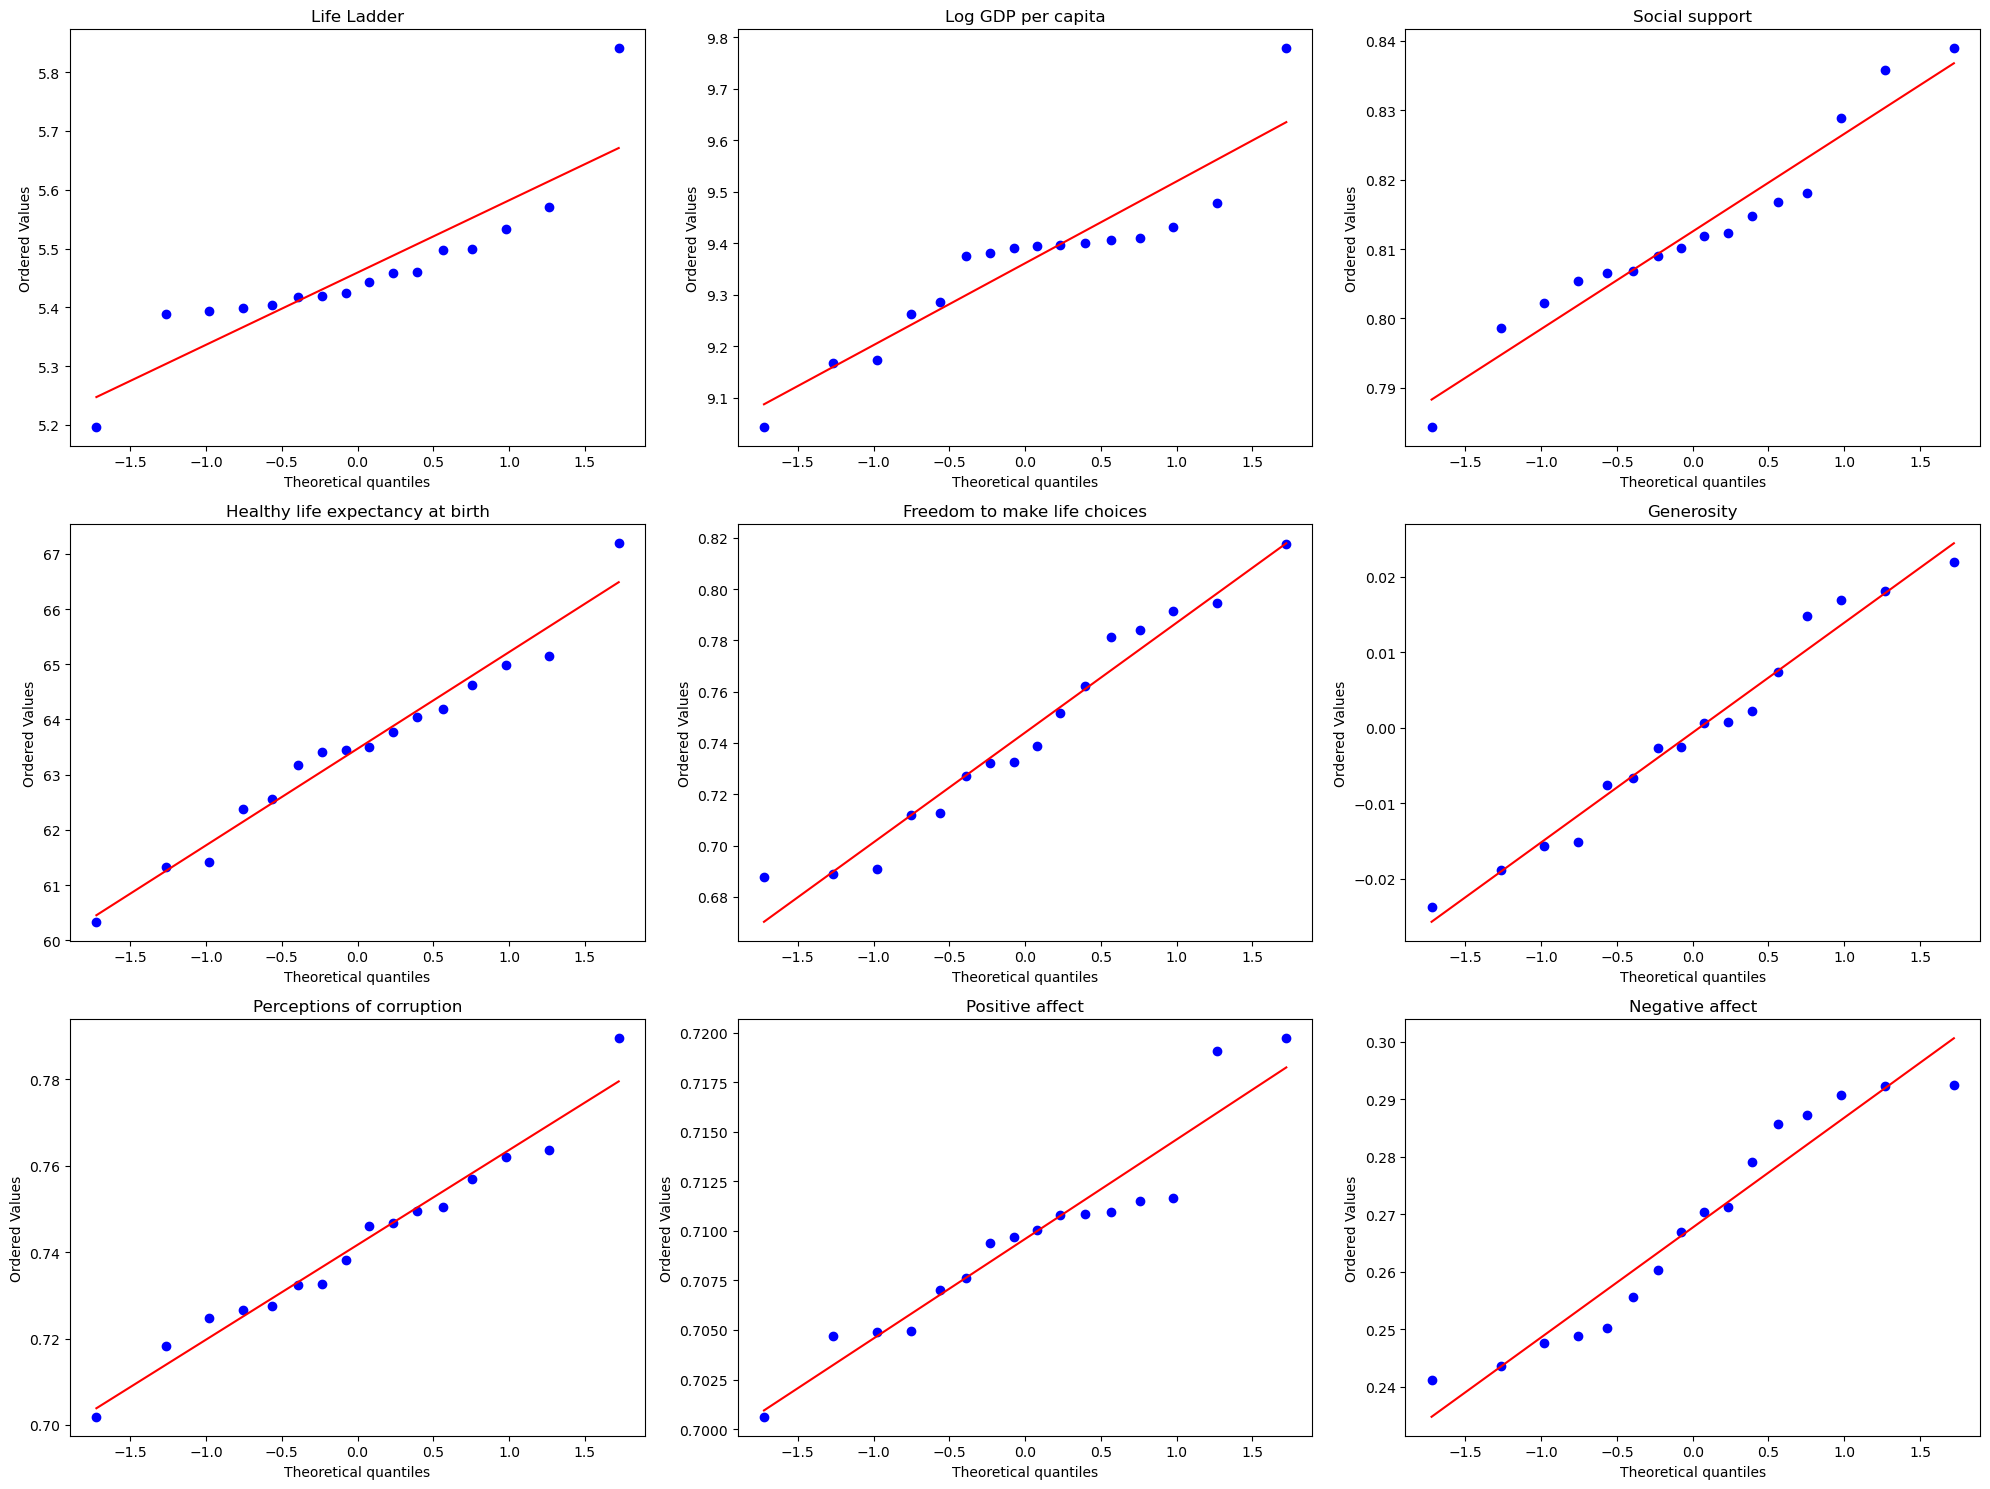

Test de Shapiro-Wilk pour Life Ladder:
Statistique = 0.8271180391311646, p-valeur = 0.006388423033058643
La variable Life Ladder ne suit pas une distribution normale.

Test de Shapiro-Wilk pour Log GDP per capita:
Statistique = 0.8841716647148132, p-valeur = 0.0450899563729763
La variable Log GDP per capita ne suit pas une distribution normale.

Test de Shapiro-Wilk pour Social support:
Statistique = 0.9508000612258911, p-valeur = 0.5024672746658325
La variable Social support suit une distribution normale.

Test de Shapiro-Wilk pour Healthy life expectancy at birth:
Statistique = 0.9770467877388, p-valeur = 0.9358128905296326
La variable Healthy life expectancy at birth suit une distribution normale.

Test de Shapiro-Wilk pour Freedom to make life choices:
Statistique = 0.9459706544876099, p-valeur = 0.4286568760871887
La variable Freedom to make life choices suit une distribution normale.

Test de Shapiro-Wilk pour Generosity:
Statistique = 0.9616580009460449, p-valeur = 0.69197005033

In [54]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Affichage des histogrammes
plt.figure(figsize=(20, 15))
for i, col in enumerate(mean_per_year.columns, 1):
    plt.subplot(3, 3, i)  # Grid 3x3
    mean_per_year[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()

# Affichage des Q-Q Plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(mean_per_year.columns, 1):
    plt.subplot(3, 3, i)  # Grid 3x3
    stats.probplot(mean_per_year[col], plot=plt)
    plt.title(col)
plt.tight_layout()
plt.show()

# Test de Shapiro-Wilk pour la normalité
for col in mean_per_year.columns:
    shapiro_test = stats.shapiro(mean_per_year[col])
    print(f"Test de Shapiro-Wilk pour {col}:")
    print(f"Statistique = {shapiro_test.statistic}, p-valeur = {shapiro_test.pvalue}")
    if shapiro_test.pvalue < 0.05:
        print(f"La variable {col} ne suit pas une distribution normale.\n")
    else:
        print(f"La variable {col} suit une distribution normale.\n")

In [55]:
# On constate que cette fois-ci, certaines variables suivent une loi normale et d'autres non.
# On va donc procéder successivement à une normalisation puis à une standardisation.
# Cela nous permettra d'analyse le jeu de données sous deux angles différents.

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Création de l'instance du scaler
scaler = MinMaxScaler()

# Appliquer le scaler à vos données
data_normalized = scaler.fit_transform(mean_per_year)

In [57]:
df_normalized = pd.DataFrame(data_normalized, columns=mean_per_year.columns, index=mean_per_year.index)

In [58]:
df_normalized

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2006,0.000000,0.000000,0.943020,0.000000,0.344346,0.679482,0.554876,0.967484,0.281796
2007,0.343911,0.175697,0.471655,0.145124,0.010310,0.843281,1.000000,0.494337,0.177080
2008,0.344275,0.167970,0.000000,0.157513,0.000000,1.000000,0.685175,0.223109,0.046976
2009,0.405107,0.297655,0.616319,0.323636,0.023521,0.375166,0.704641,0.225624,0.127703
2010,0.465911,0.473321,0.815406,0.414572,0.187016,0.566874,0.543187,0.536041,0.000000
2011,0.352933,0.329164,0.326221,0.296793,0.346196,0.178827,0.503284,0.000000,0.149895
2012,0.383493,0.480661,0.452499,0.449812,0.192545,0.461502,0.513245,0.334082,0.373146
2013,0.307073,0.460188,0.406490,0.453205,0.303032,0.534979,0.627431,0.541352,0.586756
2014,0.298464,0.451825,0.412253,0.461547,0.394873,0.888765,0.349865,0.458556,0.570579


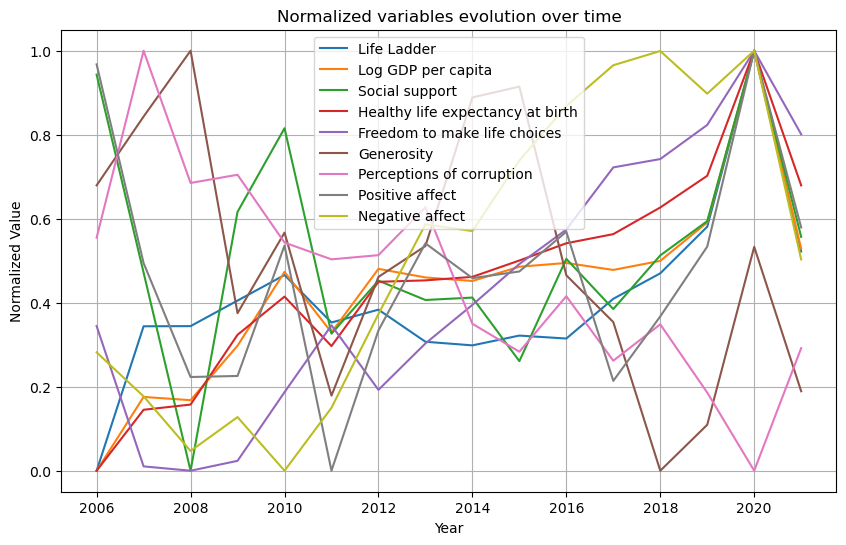

In [59]:
plt.figure(figsize=(10, 6))

for column in df_normalized.columns:
    plt.plot(mean_per_year.index, df_normalized[column], label=column)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized variables evolution over time')
plt.grid(True)
plt.show()

In [60]:
# Voici quelques observations que l'on peut tirer de ce graphique :
# Life Ladder : il semble y avoir une tendance générale à la hausse du Life Ladder au fil des ans, avec quelques 
# baisses intermédiaires. La valeur atteint son maximum en 2020.
# Cela indique donc que la perception de la qualité de vie a suivi une tendance haussière depuis 2006.

# Log GDP per capita : cette variable montre également une tendance à la hausse, culminant en 2020. 
# Il y a une forte corrélation entre le PIB par habitant et le Life Ladder, ce qui est cohérent avec l'idée que 
# les pays avec des revenus plus élevés ont généralement un plus grand bien-être.

# Social support : après un pic en 2006, le soutien social a diminué jusqu'en 2008, puis a fluctué au fil des ans, 
# atteignant un autre pic en 2020.

# Healthy life expectancy at birth : cette variable montre une tendance claire à la hausse, suggérant que 
# l'espérance de vie en bonne santé s'améliore au fil du temps.

# Freedom to make life choices : il y a une tendance générale à la hausse avec quelques fluctuations.

# Generosity : Cette variable a connu des fluctuations significatives au fil des ans.  Elle atteint sa valeur la 
# plus basse en 2018.

# Perceptions of corruption : après avoir atteint un pic en 2007, les perceptions de la corruption ont généralement
# diminué, atteignant leur point le plus bas en 2020.

# Positive affect : il y a eu des fluctuations au fil des ans, avec un pic notable en 2020.

# Negative affect : Cette variable montre une tendance générale à la hausse, atteignant son maximum en 2020.

In [61]:
# Voici des réflexions globales réalisées à partir des points précédents :

# Les années récentes, en particulier 2020, semblent avoir des valeurs maximales pour plusieurs variables, 
# notamment Life Ladder, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices,
# et Positive affect. 
# On peut supposer que la diminution globale constatée en 2021 est due à la pandémie de COVID-19 et les confinements.
# On a pu par exemple constater à cette occasion une envolée des démissions ou "big quit" (https://fr.wikipedia.org/wiki/Grande_D%C3%A9mission).
# Cependant, il serait intéressant de mener une études sur la période 2022 - 2023 pour vérifier la tendance.

# Concernant la perception de la corruption, on constate une tendance globale à la baisse entre 2006 (apogée) et 2020 (étiage)
# Étant donné ce qui a été constaté concernant les corrélations, cette baisse s'explique en grande partie par l'amélioration des 
# variables qui lui sont fortement négativement corrélées : la liberté de choix, l'espérance de vie en bonne santé et le PIB.
# En outre, on s'aperçoit que les période où elle est le plus forte sont des période de crise : 2008 (crise des 
# Subprime) et 2020 (COVID).

# On constate une hausse progressive de la négativité sur toute la période. La positivité augmente également mais de manière moins directe.
# Comme vu précédemment, il n'y a pas de corrélation forte entre ces deux variables. Toutefois, nous n'avons pas trouvé
# de point permettant d'expliquer cette tendance.

# Enfin, on constate que la générosité est la variable qui affiche la plus grande variation sur la période bien que tendentiellement en baisse entre 2006 et 2020.
# Apparaissant comme corrélée négativement à la majorité des autres variables, il serait intéressant de comprendre
# quelles sont les éléments qui l'influencent le plus.
# On pourrait émettre l'hypothèse que les crises comme celle de 2008 impactent fortement les budgets alloués aux dons
# aux associations par exemple. Ainsi, les gens auraient moins tendance à donner alors.

In [62]:
from sklearn.preprocessing import StandardScaler

# Création de l'instance du scaler
scaler = StandardScaler()

# Appliquer le scaler à vos données
data_standardized = scaler.fit_transform(mean_per_year)

In [63]:
data_standardized = pd.DataFrame(data_standardized, columns=mean_per_year.columns, index=mean_per_year.index)
data_standardized

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2006,-2.074857,-2.027722,1.763632,-1.933573,-0.295668,0.592977,0.433232,1.989834,-0.674847
2007,-0.323749,-1.203311,-0.183648,-1.319883,-1.387424,1.152499,2.350752,0.097740,-0.974139
2008,-0.321893,-1.239568,-2.132124,-1.267491,-1.421120,1.687836,0.994537,-0.986893,-1.345995
2009,-0.012152,-0.631052,0.413979,-0.565003,-1.344245,-0.446540,1.078396,-0.976835,-1.115265
2010,0.297449,0.193211,1.236436,-0.180457,-0.809880,0.208318,0.382879,0.264512,-1.480258
2011,-0.277809,-0.483205,-0.784457,-0.678512,-0.289619,-1.117216,0.210983,-1.879096,-1.051839
2012,-0.122207,0.227656,-0.262783,-0.031438,-0.791811,-0.151626,0.253892,-0.543113,-0.413757
2013,-0.511317,0.131590,-0.452853,-0.017091,-0.430697,0.099367,0.745786,0.285750,0.196768
2014,-0.555150,0.092349,-0.429046,0.018187,-0.130526,1.307867,-0.449921,-0.045347,0.150534


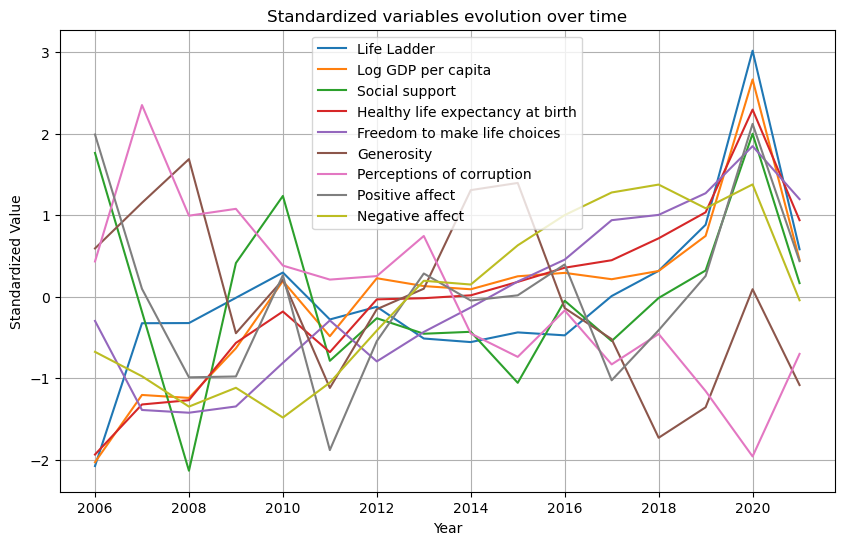

In [64]:
plt.figure(figsize=(10, 6))

for column in data_standardized.columns:
    plt.plot(mean_per_year.index, data_standardized[column], label=column)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title('Standardized variables evolution over time')
plt.grid(True)
plt.show()

In [65]:
# La traitement des données par standardisation ne laisse pas apparaître de différence majeure par rapport à la 
# normalisation.

In [ ]:
# Nous allons maintenant tenter d'analyser la varaible de corruption en la recoupant avec le classement 
# de Reporters Sans Frontières sur la liberté de la presse.

In [161]:
# Import du classement RSF
rsf = pd.read_excel('../data/RSF.xlsx')
rsf

,Year (N),EN_country,Zone,Rank N,Score N,FR_country
0,2021,Afghanistan,Asie-Pacifique,122,59.81,Afghanistan
1,2020,Afghanistan,Asie-Pacifique,122,62.30,Afghanistan
2,2019,Afghanistan,Asie-Pacifique,121,63.45,Afghanistan
3,2018,Afghanistan,Asie-Pacifique,118,62.72,Afghanistan
4,2017,Afghanistan,Asie-Pacifique,120,60.54,Afghanistan
...,...,...,...,...,...,...
3002,2009,Zimbabwe,Afrique,136,46.50,Zimbabwe
3003,2008,Zimbabwe,Afrique,151,54.00,Zimbabwe
3004,2007,Zimbabwe,Afrique,149,62.00,Zimbabwe
3005,2006,Zimbabwe,Afrique,140,50.00,Zimbabwe


In [162]:
# Affichage du jeu de données RSf après tri par ordre alphabétique
sorted_rsf = rsf.sort_values(by = 'EN_country', ascending = True)
sorted_rsf.EN_country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Cyprus North', 'Czech Republic',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       

In [163]:
# Affichage du jeu de données df_global2 après tri par ordre alphabétique
sorted_df = df_global2.sort_values(by = 'Country name', ascending = True)
sorted_df['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [164]:
# Affichage des pays de df_global2 manquant dans rsf.
missing_rsf = df_global2.loc[df_global2['Country name'].apply(lambda x: x not in rsf.EN_country.unique())]
missing_rsf["Country name"].unique()

array(['Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Hong Kong S.A.R. of China', 'Iran', 'Laos', 'North Cyprus',
       'Palestinian Territories', 'Russia', 'Somaliland region',
       'Swaziland', 'Syria', 'Taiwan Province of China'], dtype=object)

In [165]:
# 3. Création d'un tableau de correspondance des noms de pays pour modification de RSF
country_mappings = {
    'The Democratic Republic Of The Congo': 'Congo (Kinshasa)',
    'Congo': 'Congo (Brazzaville)',
    'Hong Kong': 'Hong Kong S.A.R. of China',
    'Islamic Republic of Iran': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'Palestine': 'Palestinian Territories',
    'Russian Federation': 'Russia',
    'Syrian Arab Republic': 'Syria',
    'Taiwan': 'Taiwan Province of China',
    'Eswatini': 'Swaziland',
    'United States (US territory)': 'United States',
    'Cyprus North': 'North Cyprus',
    # Ajouter d'autres correspondances si nécessaire
}

# 4. Harmoniser les noms dans RSF
rsf.replace(country_mappings,
               inplace = True)

# 5. Filtrer RSF
#countries_RSF_filtered = [country for country in countries_RSF_harmonized if country in df_global2['Country name']]

In [166]:
# Affichage des pays de df_global2 manquant dans rsf.
missing_rsf = df_global2.loc[df_global2['Country name'].apply(lambda x: x not in rsf.EN_country.unique())]
missing_rsf["Country name"].unique()

array(['Somaliland region'], dtype=object)

In [168]:
# Affichage des pays de rsf manquant dans df_global2.
missing_df = rsf.loc[rsf.EN_country.apply(lambda x: x not in df_global2['Country name'].unique())]
missing_df.EN_country.unique()

array(['Andorra', 'Brunei Darussalam', 'Cape Verde', 'Eritrea', 'Fiji',
       'Guinea-Bissau', 'Equatorial Guinea', 'Israel (Israeli territory)',
       'Israel (outside Israeli territory)', 'Liechtenstein',
       'Papua New Guinea', "Democratic People's Republic of Korea",
       'Serbia-Montenegro', 'Seychelles', 'East Timor', 'Tonga',
       'United States (in Irak)', 'United States (outside US territory)',
       'Samoa', 'OECS'], dtype=object)

In [ ]:
# Le Somaliland n'étant pas un pays officiellement reconnu à l'ONU car non séparé de la Somalie,
# On décide de le supprimer du jeu de donnée df_global2 pour cette analyse.
# De la même manière, on supprimer de rsf les pays non présents dans df_global2.

In [170]:
sorted_df = sorted_df[sorted_df["Country name"] != "Somaliland region"]

In [171]:
# Affichage des pays de df_global2 manquant dans rsf.
missing_rsf = sorted_df.loc[sorted_df['Country name'].apply(lambda x: x not in rsf.EN_country.unique())]
missing_rsf["Country name"].unique()

array([], dtype=object)

In [175]:
sorted_rsf = sorted_rsf[]

KeyError: 'Country name'

In [ ]:
missing_df = rsf.loc[rsf.EN_country.apply(lambda x: x not in df_global2['Country name'].unique())]
missing_df.EN_country.unique()